In [ ]:
# DATA COllECTION
# ED & LY : PROJECT LOCATION (500 each?) 
# KN : URA DATA (DONE)

# DATA PREPROCESSING
# KN: Combining all ura data
# KN : One Hot Encoding for district, One Hot Encoding for bedrooms
# KN : Refactor code to display data Prepocessing Step
# LY : 1) Number of bedroom demand, avg price-psf by district to display in follium
# KN : Combining bedroom demand & URA data set together
# 
# Models
# ED: Root Mean Squared Error
# ED: KNN
# LY: Ridge regression
# KN: XGBoost
# LY: Display of val accuracy vs test accuracy (Graph display follow lab)

# Additional
# Decision Tree Model, Neural network mdoel

In [1]:
import pandas as pd
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime
from IPython.display import display, HTML


df_1_5=pd.read_csv('ura_1_5.csv',skiprows=1)
df_1_5=df_1_5[:-6] #Get rid of tail non-data description
display(df_1_5.tail(2))

df_6_10=pd.read_csv('ura_6_10.csv',skiprows=1)
df_6_10=df_6_10[:-6] #Get rid of tail non-data description
display(df_6_10.tail(2))

df_11_15=pd.read_csv('ura_11_15.csv',skiprows=1)
df_11_15=df_11_15[:-6] #Get rid of tail non-data description
display(df_11_15.tail(2))

df_16_20=pd.read_csv('ura_16_20.csv',skiprows=1)
df_16_20=df_16_20[:-6] #Get rid of tail non-data description
display(df_16_20.tail(2))

df_21_26=pd.read_csv('ura_21_26.csv',skiprows=1)
df_21_26=df_21_26[:-6] #Get rid of tail non-data description
display(df_21_26.tail(2))

df_27_28=pd.read_csv('ura_27_28.csv',skiprows=1)
df_27_28=df_27_28[:-6] #Get rid of tail non-data description
display(df_27_28.tail(2))

print("====================Final Dataframe=======================")
df = pd.concat([df_1_5, df_6_10,df_11_15,df_16_20,df_21_26,df_27_28], ignore_index=True)
display(df.tail(2))

df_dict=pd.read_csv('property_project.csv')
df_dict=df_dict[['address','lat','long']]
df_dict=df_dict.set_index('address').to_dict()
df_dict['lat']['JI XIANG COURT']

dates_dict={
    "Jan": 1,
    "Feb": 2,
    "Mar": 3,
    "Apr": 4,
    "May": 5,
    "Jun":6,
    "Jul":7,
    "Aug":8,
    "Sep":9,
    "Oct":10,
    "Nov":11,
    "Dec":12    
}

# Preprocessing
# -Converting Floor Area(1400 to 1500 -> 1450)
# -Monthly rental/ sqft> Monthly rental Psf
# -Building/Project Name , District -> lat, long
# -Lease Commencement Date -> date
def g(x):
    if(x=='ANGULLIA PARK RESIDENCES @ ORCHARD'):
        return 'ANGULLIA PARK RESIDENCES@ORCHARD'
    return x
df['Building/Project Name'] = df['Building/Project Name'].apply(g)
    
    
def f(x):
    try:
        return sum([int(item) for item in str(x).split(' to ')])/2
    except:
        return 0
df['Floor Area (sq ft)'] = df['Floor Area (sq ft)'].apply(f)
df['Monthly Rent/ psf']=df['Monthly Gross Rent($)']/df['Floor Area (sq ft)']
df['lat']=df['Building/Project Name'].apply(lambda x:df_dict['lat'][x])
df['long']=df['Building/Project Name'].apply(lambda x:df_dict['long'][x])
def g(x):
    m,y=x.split('-')
    return pd.Timestamp(int(y),dates_dict[m],1).toordinal()
df['Lease Commencement Date']=df['Lease Commencement Date'].apply(g).astype(float)
# # Remove missing bedroom data
df['No. of Bedroom(for Non-Landed Only)']=df['No. of Bedroom(for Non-Landed Only)'].replace('na*',np.NaN)
df=df.dropna()
df = df.drop(df[df["Floor Area (sq ft)"]<50].index)

# # consolidaiton of Data
df=df[['Monthly Gross Rent($)','Monthly Rent/ psf','Postal District','lat','long','No. of Bedroom(for Non-Landed Only)','Floor Area (sq ft)','Lease Commencement Date']]
df['No. of Bedroom(for Non-Landed Only)']=df['No. of Bedroom(for Non-Landed Only)'].astype(float)
df['Floor Area (sq ft)']=df['Floor Area (sq ft)'].astype(float)

# KN : One Hot Encoding for district, One Hot Encoding for bedrooms
# KN : Refactor code to display data Prepocessing Step
df=df.rename(index=str, columns={"Monthly Gross Rent($)": "monthly_gross_rent", "Monthly Rent/ psf": "monthly_rent_psf","Postal District":"district","lat": "lat","long": "long","No. of Bedroom(for Non-Landed Only)": "no_bedroom","Floor Area (sq ft)": "floor_area","Lease Commencement Date": "date" })
print("====================Preprocessed Dataframe=======================")
display(df.tail(3))


,S/N,Building/Project Name,Street Name,Postal District,Type,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq ft),Lease Commencement Date
35483,35484,MERAPRIME,JALAN BUKIT HO SWEE,3.0,Non-landed Properties,2,5000.0,800 to 900,Nov-2015
35484,35485,ONE SHENTON,SHENTON WAY,1.0,Non-landed Properties,2,5200.0,1000 to 1100,Nov-2015


,S/N,Building/Project Name,Street Name,Postal District,Type,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq ft),Lease Commencement Date
53877,53878,RIVERGATE,ROBERTSON QUAY,9.0,Non-landed Properties,2,5600.0,1000 to 1100,Nov-2015
53878,53879,CITY SQUARE RESIDENCES,KITCHENER LINK,8.0,Non-landed Properties,4,5400.0,1500 to 1600,Nov-2015


,S/N,Building/Project Name,Street Name,Postal District,Type,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq ft),Lease Commencement Date
59050,59051,VILLA MARINA,JALAN SEMPADAN,15.0,Non-landed Properties,3,3000.0,1200 to 1300,Nov-2015
59051,59052,D'MIRA,BOON TECK ROAD,12.0,Non-landed Properties,2,3200.0,900 to 1000,Nov-2015


,S/N,Building/Project Name,Street Name,Postal District,Type,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq ft),Lease Commencement Date
44159,44160,LIVIA,PASIR RIS GROVE,18.0,Non-landed Properties,4,4000.0,1500 to 1600,Nov-2015
44160,44161,RIO VISTA,UPPER SERANGOON VIEW,19.0,Non-landed Properties,4,3100.0,1300 to 1400,Nov-2015


,S/N,Building/Project Name,Street Name,Postal District,Type,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq ft),Lease Commencement Date
26456,26457,FORESQUE RESIDENCES,PETIR ROAD,23.0,Non-landed Properties,3,3200.0,1100 to 1200,Nov-2015
26457,26458,HILLINGTON GREEN,HILLVIEW AVENUE,23.0,Non-landed Properties,3,2850.0,1300 to 1400,Nov-2015


,S/N,Building/Project Name,Street Name,Postal District,Type,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq ft),Lease Commencement Date
4679,4680,H2O RESIDENCES,FERNVALE LINK,28.0,Non-landed Properties,3,2700.0,1100 to 1200,Nov-2015
4680,4681,H2O RESIDENCES,FERNVALE LINK,28.0,Non-landed Properties,3,2500.0,1100 to 1200,Nov-2015


====================Final Dataframe=======================


,S/N,Building/Project Name,Street Name,Postal District,Type,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq ft),Lease Commencement Date
223714,4680,H2O RESIDENCES,FERNVALE LINK,28.0,Non-landed Properties,3,2700.0,1100 to 1200,Nov-2015
223715,4681,H2O RESIDENCES,FERNVALE LINK,28.0,Non-landed Properties,3,2500.0,1100 to 1200,Nov-2015


====================Preprocessed Dataframe=======================


,monthly_gross_rent,monthly_rent_psf,district,lat,long,no_bedroom,floor_area,date
223713,2400.0,2.823529,27.0,1.438604,103.831283,2.0,850.0,735903.0
223714,2700.0,2.347826,28.0,1.392766,103.879232,3.0,1150.0,735903.0
223715,2500.0,2.173913,28.0,1.392766,103.879232,3.0,1150.0,735903.0


In [2]:
X=np.array(df.drop(['monthly_gross_rent','monthly_rent_psf'],1))
Y=np.array(df['monthly_rent_psf'])
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.2)
clf= LinearRegression()
clf.fit(X_train, y_train)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
accuracy=clf.score(X_test,y_test)
clf,accuracy

(158500, 6)
(39625, 6)
(158500,)
(39625,)


(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False), 0.4392210748266497)

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Matrix Heatmap
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [4]:
train=df
# Top 10 Heatmap
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'monthly_gross_rent')['monthly_gross_rent'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols.values, xticklabels=cols.values)
#plt.show()


In [5]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,monthly_gross_rent
1,floor_area
2,no_bedroom
3,monthly_rent_psf
4,long
5,lat
6,date


In [6]:
# Living Area vs Sale Price
# 'Monthly Gross Rent($)','Monthly Rent/ psf','lat','long','No. of Bedroom(for Non-Landed Only)','Floor Area (sq ft)','Lease Commencement Date'
#sns.jointplot(x=train['floor_area'], y=train['monthly_gross_rent'], kind='reg')
#sns.jointplot(x=train['floor_area'], y=train['monthly_rent_psf'], kind='reg')

In [91]:
# Count of project being rented,
# Count of Bed Room
import csv
import pandas as pd
import os
bedroom_1=df[(df.no_bedroom>0.9)&(df.no_bedroom <1.1)]
bedroom_2=df[(df.no_bedroom>1.9)&(df.no_bedroom <2.1)]
bedroom_3=df[(df.no_bedroom>2.9)&(df.no_bedroom <3.1)]
bedroom_4=df[(df.no_bedroom>3.9)&(df.no_bedroom <4.1)]
bedroom_5=df[(df.no_bedroom>4.9)&(df.no_bedroom <5.1)]
#print(bedroom_1, bedroom_2,bedroom_3,bedroom_4,bedroom_5)
total = 0

print(total)
#print(bedroom_1[(bedroom_1.district>(0.9))&(bedroom_1.district<(1.1))]['monthly_rent_psf'])
# LY : 1) Number of bedroom demand, avg price-psf by district to display in follium

# Number of bedroom demand for 1 Bedrooms, save as a csv file
with open('./data/bedroom_1.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['name','longitude','latitude','id','bedroom'])
    for i in range(0,29):
        br = bedroom_1[(bedroom_1.district>(i + 0.9))&(bedroom_1.district<(i+ 1.1))]
        #print(br['district'].count())
        filewriter.writerow(['0','0','0',i+1,br['district'].count()])

# Average Price Psf for 1 Bedrooms, save as a csv file
with open('./data/bedroom_1_psf.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    total = 0
    filewriter.writerow(['name','longitude','latitude','id','price'])
    for i in range(0,29):
        br = bedroom_1[(bedroom_1.district>(i + 0.9))&(bedroom_1.district<(i+ 1.1))]
        for row in br['monthly_rent_psf']:
            total += row
        #print(br['district'].count())
        if(br['district'].count()!=0):
            filewriter.writerow(['0','0','0',i+1,(total/br['district'].count())])
        else:
            filewriter.writerow(['0','0','0',i+1,0])

# Number of bedroom demand for 2 Bedrooms, save as a csv file
with open('./data/bedroom_2.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['name','longitude','latitude','id','bedroom'])
    for i in range(0,29):
        br = bedroom_2[(bedroom_2.district>(i + 0.9))&(bedroom_2.district<(i+ 1.1))]
        #print(br['district'].count())
        filewriter.writerow(['0','0','0',i+1,br['district'].count()])

# Average Price Psf for 2 Bedrooms, save as a csv file
with open('./data/bedroom_2_psf.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    total = 0
    filewriter.writerow(['name','longitude','latitude','id','price'])
    for i in range(0,29):
        br = bedroom_2[(bedroom_2.district>(i + 0.9))&(bedroom_2.district<(i+ 1.1))]
        for row in br['monthly_rent_psf']:
            total += row
        #print(br['district'].count())
        if(br['district'].count()!=0):
            filewriter.writerow(['0','0','0',i+1,(total/br['district'].count())])
        else:
            filewriter.writerow(['0','0','0',i+1,0])

# Number of bedroom demand for 3 Bedrooms, save as a csv file
with open('./data/bedroom_3.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['name','longitude','latitude','id','bedroom'])
    for i in range(0,29):
        br = bedroom_3[(bedroom_3.district>(i + 0.9))&(bedroom_3.district<(i+ 1.1))]
        #print(br['district'].count())
        filewriter.writerow(['0','0','0',i+1,br['district'].count()])
        
# Average Price Psf for 3 Bedrooms, save as a csv file
with open('./data/bedroom_3_psf.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    total = 0
    filewriter.writerow(['name','longitude','latitude','id','price'])
    for i in range(0,29):
        br = bedroom_3[(bedroom_3.district>(i + 0.9))&(bedroom_3.district<(i+ 1.1))]
        for row in br['monthly_rent_psf']:
            total += row
        #print(br['district'].count())
        if(br['district'].count()!=0):
            filewriter.writerow(['0','0','0',i+1,(total/br['district'].count())])
        else:
            filewriter.writerow(['0','0','0',i+1,0])

# Number of bedroom demand for 4 Bedrooms, save as a csv file
with open('./data/bedroom_4.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['name','longitude','latitude','id','bedroom'])
    for i in range(0,29):
        br = bedroom_4[(bedroom_4.district>(i + 0.9))&(bedroom_4.district<(i+ 1.1))]
        #print(br['district'].count())
        filewriter.writerow(['0','0','0',i+1,br['district'].count()])
        
# Average Price Psf for 4 Bedrooms, save as a csv file
with open('./data/bedroom_4_psf.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    total = 0
    filewriter.writerow(['name','longitude','latitude','id','price'])
    for i in range(0,29):
        br = bedroom_4[(bedroom_4.district>(i + 0.9))&(bedroom_4.district<(i+ 1.1))]
        for row in br['monthly_rent_psf']:
            total += row
        #print(br['district'].count())
        if(br['district'].count()!=0):
            filewriter.writerow(['0','0','0',i+1,(total/br['district'].count())])
        else:
            filewriter.writerow(['0','0','0',i+1,0])

# Number of bedroom demand for 5 Bedrooms, save as a csv file
with open('./data/bedroom_5.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['name','longitude','latitude','id','bedroom'])
    for i in range(0,29):
        br = bedroom_5[(bedroom_5.district>(i + 0.9))&(bedroom_5.district<(i+ 1.1))]
        #print(br['district'].count())
        filewriter.writerow(['0','0','0',i+1,br['district'].count()])

# Average Price Psf for 5 Bedrooms, save as a csv file
with open('./data/bedroom_5_psf.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    total = 0
    filewriter.writerow(['name','longitude','latitude','id','price'])
    for i in range(0,29):
        br = bedroom_5[(bedroom_5.district>(i + 0.9))&(bedroom_5.district<(i+ 1.1))]
        for row in br['monthly_rent_psf']:
            total += row
        #print(br['district'].count())
        if(br['district'].count()!=0):
            filewriter.writerow(['0','0','0',i+1,(total/br['district'].count())])
        else:
            filewriter.writerow(['0','0','0',i+1,0])


# KN : Combining bedroom demand & URA data set together
#sns.jointplot(x=train['no_bedroom'], y=train['district'], kind='kde')
#sns.jointplot(x=train['lat'], y=train['long'], kind='kde')


0


In [77]:
import folium
import json
import os
import pandas as pd
from branca.colormap import linear
sg_map1 = folium.Map(location=[1.38, 103.8], zoom_start=12)
sg_map2 = folium.Map(location=[1.38, 103.8], zoom_start=12)
sg_map3 = folium.Map(location=[1.38, 103.8], zoom_start=12)
sg_map4 = folium.Map(location=[1.38, 103.8], zoom_start=12)
sg_map5 = folium.Map(location=[1.38, 103.8], zoom_start=12)

sg_map1_psf = folium.Map(location=[1.38, 103.8], zoom_start=12)
sg_map2_psf = folium.Map(location=[1.38, 103.8], zoom_start=12)
sg_map3_psf = folium.Map(location=[1.38, 103.8], zoom_start=12)
sg_map4_psf = folium.Map(location=[1.38, 103.8], zoom_start=12)
sg_map5_psf = folium.Map(location=[1.38, 103.8], zoom_start=12)

sg_districts = os.path.join('data','district.json')
geo_json_data = json.load(open(sg_districts))
print(geo_json_data)

{'features': [{'properties': {'id': '1', 'name': 'City - Marina Area', 'latitude': 1.2816318469, 'longitude': 103.857247857}, 'type': 'Feature', 'geometry': {'coordinates': [[[[103.86557, 1.30013], [103.86561, 1.30001], [103.86471, 1.29897], [103.86406, 1.29726], [103.86442, 1.29661], [103.86427, 1.29565], [103.8646, 1.29388], [103.86501, 1.29015], [103.86546, 1.28491], [103.86751, 1.28396], [103.86896, 1.28294], [103.87086, 1.28124], [103.87136, 1.28049], [103.87199, 1.27876], [103.87197, 1.27778], [103.87117, 1.2764], [103.86298, 1.27037], [103.86314, 1.27014], [103.85989, 1.26778], [103.86173, 1.26522], [103.86086, 1.26458], [103.85901, 1.26715], [103.85742, 1.266], [103.85653, 1.26566], [103.85507, 1.26583], [103.85433, 1.26634], [103.85253, 1.2681], [103.85162, 1.2681], [103.85162, 1.27161], [103.85294, 1.27372], [103.84956, 1.27514], [103.84727, 1.27655], [103.84537, 1.2787], [103.84412, 1.28025], [103.84382, 1.28094], [103.84394, 1.28181], [103.84308, 1.28226], [103.84335, 1.282

In [78]:
#For 1 Bedroom
br1 = os.path.join('data', 'bedroom_1.csv')
br1_file = pd.read_csv(br1)

br1_file.head(5)


,name,longitude,latitude,id,bedroom
0,0,0,0,1,2323
1,0,0,0,2,2531
2,0,0,0,3,1192
3,0,0,0,4,323
4,0,0,0,5,1308


In [79]:
colormap1 = linear.YlGn_09.scale(
    br1_file.bedroom.min(),
    br1_file.bedroom.max())

print(colormap1(75))

colormap1

#ffffe0


In [80]:
# Plotting Choropleth Map for 1 Bedroom
br1_dict = br1_file.set_index('id')['bedroom']

folium.GeoJson(
    geo_json_data,
    name='test_file',
    style_function=lambda feature: {
        'fillColor': colormap1(br1_dict[int(feature['properties']['id'])]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,

    }
).add_to(sg_map1)

colormap1.caption = 'Bedroom 1 Demand'
colormap1.add_to(sg_map1)

folium.LayerControl().add_to(sg_map1)
sg_map1

In [81]:
#For 1 Bedroom Avg Price Psf
br1_psf = os.path.join('data', 'bedroom_1_psf.csv')
br1_psf_file = pd.read_csv(br1_psf)

br1_psf_file.head(5)


,name,longitude,latitude,id,price
0,0,0,0,1,5.611489
1,0,0,0,2,11.027895
2,0,0,0,3,28.344298
3,0,0,0,4,109.754731
4,0,0,0,5,31.618484


In [83]:
colormap1_psf = linear.YlGn_09.scale(
    br1_psf_file.price.min(),
    br1_psf_file.price.max())

print(colormap1_psf(75))

colormap1_psf

#feffdf


In [104]:
# Plotting Choropleth Map for 1 Bedroom Avg Price psf
br1_psf_dict = br1_psf_file.set_index('id')['price']

folium.GeoJson(
    geo_json_data,
    name='test_file',
    style_function=lambda feature: {
        'fillColor': colormap1_psf(br1_psf_dict[int(feature['properties']['id'])]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,

    }
).add_to(sg_map1_psf)

colormap1_psf.caption = 'Bedroom 1 Average Price Psf ($)'
colormap1_psf.add_to(sg_map1_psf)

folium.LayerControl().add_to(sg_map1_psf)
sg_map1_psf

In [87]:
#For 2 Bedrooms
br2 = os.path.join('data', 'bedroom_2.csv')
br2_file = pd.read_csv(br2)

br2_file.head(5)

,name,longitude,latitude,id,bedroom
0,0,0,0,1,1820
1,0,0,0,2,1652
2,0,0,0,3,2094
3,0,0,0,4,2084
4,0,0,0,5,3332


In [92]:
colormap2 = linear.YlGn_09.scale(
    br2_file.bedroom.min(),
    br2_file.bedroom.max())

print(colormap2(75))

colormap2

#ffffe1


In [93]:
# Plotting Choropleth Map for 2 Bedrooms
br2_dict = br2_file.set_index('id')['bedroom']

folium.GeoJson(
    geo_json_data,
    name='test_file',
    style_function=lambda feature: {
        'fillColor': colormap2(br2_dict[int(feature['properties']['id'])]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,

    }
).add_to(sg_map2)

colormap2.caption = 'Bedroom 2 Demand'
colormap2.add_to(sg_map2)

folium.LayerControl().add_to(sg_map2)
sg_map2

In [94]:
#For 2 Bedrooms Average Price Psf
br2_psf = os.path.join('data', 'bedroom_2_psf.csv')
br2_psf_file = pd.read_csv(br2_psf)

br2_psf_file.head(5)

,name,longitude,latitude,id,price
0,0,0,0,1,5.095687
1,0,0,0,2,10.558712
2,0,0,0,3,12.264556
3,0,0,0,4,16.536013
4,0,0,0,5,13.566755


In [74]:
colormap2_psf = linear.YlGn_09.scale(
    br2_psf_file.price.min(),
    br2_psf_file.price.max())

print(colormap2_psf(75))

colormap2_psf

#fafec9


In [103]:
# Plotting Choropleth Map for 2 Bedrooms Average Price Psf
br2_psf_dict = br2_psf_file.set_index('id')['price']

folium.GeoJson(
    geo_json_data,
    name='test_file',
    style_function=lambda feature: {
        'fillColor': colormap2_psf(br2_psf_dict[int(feature['properties']['id'])]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,

    }
).add_to(sg_map2_psf)

colormap2_psf.caption = 'Bedroom 2 Average Price Psf ($)'
colormap2_psf.add_to(sg_map2_psf)

folium.LayerControl().add_to(sg_map2_psf)
sg_map2_psf

In [96]:
#For 3 Bedrooms
br3 = os.path.join('data', 'bedroom_3.csv')
br3_file = pd.read_csv(br3)

br3_file.head(5)

,name,longitude,latitude,id,bedroom
0,0,0,0,1,898
1,0,0,0,2,224
2,0,0,0,3,2825
3,0,0,0,4,3297
4,0,0,0,5,3684


In [97]:
colormap3 = linear.YlGn_09.scale(
    br3_file.bedroom.min(),
    br3_file.bedroom.max())

print(colormap3(75))

colormap3

#ffffe2


In [105]:
# Plotting Choropleth Map for 3 Bedrooms
br3_dict = br3_file.set_index('id')['bedroom']

folium.GeoJson(
    geo_json_data,
    name='test_file',
    style_function=lambda feature: {
        'fillColor': colormap3(br3_dict[int(feature['properties']['id'])]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,

    }
).add_to(sg_map3)

colormap3.caption = 'Bedroom 3 Demand'
colormap3.add_to(sg_map3)

folium.LayerControl().add_to(sg_map3)
sg_map3

In [99]:
#For 3 Bedrooms Average Price Psf
br3_psf = os.path.join('data', 'bedroom_3_psf.csv')
br3_psf_file = pd.read_csv(br3_psf)

br3_psf_file.head(5)

,name,longitude,latitude,id,price
0,0,0,0,1,4.162106
1,0,0,0,2,20.641091
2,0,0,0,3,5.139585
3,0,0,0,4,8.180261
4,0,0,0,5,10.268402


In [100]:
colormap3_psf = linear.YlGn_09.scale(
    br3_psf_file.price.min(),
    br3_psf_file.price.max())

print(colormap3_psf(75))

colormap3_psf

#ffffe0


In [106]:
# Plotting Choropleth Map for 3 Bedrooms Average Price Psf
br3_psf_dict = br3_psf_file.set_index('id')['price']

folium.GeoJson(
    geo_json_data,
    name='test_file',
    style_function=lambda feature: {
        'fillColor': colormap3_psf(br3_psf_dict[int(feature['properties']['id'])]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,

    }
).add_to(sg_map3_psf)

colormap3_psf.caption = 'Bedroom 3 Average Price Psf ($)'
colormap3_psf.add_to(sg_map3_psf)

folium.LayerControl().add_to(sg_map3_psf)
sg_map3_psf

In [107]:
#For 4 Bedrooms
br4 = os.path.join('data', 'bedroom_4.csv')
br4_file = pd.read_csv(br4)

br4_file.head(5)

,name,longitude,latitude,id,bedroom
0,0,0,0,1,319
1,0,0,0,2,0
2,0,0,0,3,381
3,0,0,0,4,899
4,0,0,0,5,539


In [108]:
colormap4 = linear.YlGn_09.scale(
    br4_file.bedroom.min(),
    br4_file.bedroom.max())

print(colormap4(75))

colormap4

#feffdc


In [109]:
# Plotting Choropleth Map for 4 Bedrooms
br4_dict = br4_file.set_index('id')['bedroom']

folium.GeoJson(
    geo_json_data,
    name='test_file',
    style_function=lambda feature: {
        'fillColor': colormap4(br4_dict[int(feature['properties']['id'])]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,

    }
).add_to(sg_map4)

colormap4.caption = 'Bedroom 4 Demand'
colormap4.add_to(sg_map4)

folium.LayerControl().add_to(sg_map4)
sg_map4

In [110]:
#For 4 Bedrooms Average Price Psf
br4_psf = os.path.join('data', 'bedroom_4_psf.csv')
br4_psf_file = pd.read_csv(br4_psf)

br4_psf_file.head(5)

,name,longitude,latitude,id,price
0,0,0,0,1,4.205821
1,0,0,0,2,0.000000
2,0,0,0,3,6.939728
3,0,0,0,4,6.831415
4,0,0,0,5,14.262206


In [111]:
colormap4_psf = linear.YlGn_09.scale(
    br4_psf_file.price.min(),
    br4_psf_file.price.max())

print(colormap4_psf(75))

colormap4_psf

#fcfed0


In [112]:
# Plotting Choropleth Map for 4 Bedrooms Average Price Psf
br4_psf_dict = br4_psf_file.set_index('id')['price']

folium.GeoJson(
    geo_json_data,
    name='test_file',
    style_function=lambda feature: {
        'fillColor': colormap4_psf(br4_psf_dict[int(feature['properties']['id'])]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,

    }
).add_to(sg_map4_psf)

colormap4_psf.caption = 'Bedroom 4 Average Price Psf ($)'
colormap4_psf.add_to(sg_map4_psf)

folium.LayerControl().add_to(sg_map4_psf)
sg_map4_psf

In [113]:
#For 5 Bedrooms
br5 = os.path.join('data', 'bedroom_5.csv')
br5_file = pd.read_csv(br5)

br5_file.head(5)

,name,longitude,latitude,id,bedroom
0,0,0,0,1,0
1,0,0,0,2,0
2,0,0,0,3,2
3,0,0,0,4,0
4,0,0,0,5,52


In [114]:
colormap5 = linear.YlGn_09.scale(
    br5_file.bedroom.min(),
    br5_file.bedroom.max())

print(colormap5(75))

colormap5

#004529


In [115]:
# Plotting Choropleth Map for 4 Bedrooms
br5_dict = br5_file.set_index('id')['bedroom']

br5_dict[1]

folium.GeoJson(
    geo_json_data,
    name='test_file',
    style_function=lambda feature: {
        'fillColor': colormap5(br5_dict[int(feature['properties']['id'])]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,

    }
).add_to(sg_map5)

colormap5.caption = 'Bedroom 5 Demand'
colormap5.add_to(sg_map5)

folium.LayerControl().add_to(sg_map5)
sg_map5

In [116]:
#For 5 Bedrooms Average Price Psf
br5_psf = os.path.join('data', 'bedroom_5_psf.csv')
br5_psf_file = pd.read_csv(br5_psf)

br5_psf_file.head(5)

,name,longitude,latitude,id,price
0,0,0,0,1,0.000000
1,0,0,0,2,0.000000
2,0,0,0,3,3.871795
3,0,0,0,4,0.000000
4,0,0,0,5,2.500494


In [117]:
colormap5_psf = linear.YlGn_09.scale(
    br5_psf_file.price.min(),
    br5_psf_file.price.max())

print(colormap5_psf(75))

colormap5_psf

#f9fdc1


In [118]:
# Plotting Choropleth Map for 5 Bedrooms Average Price Psf
br5_psf_dict = br5_psf_file.set_index('id')['price']

folium.GeoJson(
    geo_json_data,
    name='test_file',
    style_function=lambda feature: {
        'fillColor': colormap5_psf(br5_psf_dict[int(feature['properties']['id'])]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,

    }
).add_to(sg_map5_psf)

colormap5_psf.caption = 'Bedroom 5 Average Price Psf ($)'
colormap5_psf.add_to(sg_map5_psf)

folium.LayerControl().add_to(sg_map5_psf)
sg_map5_psf

In [58]:

bedroom_1[(bedroom_1.district>0.9)&(bedroom_1.district<1.1)].plot(x='date',y=('monthly_rent_psf'),figsize=(10,10),kind='scatter')

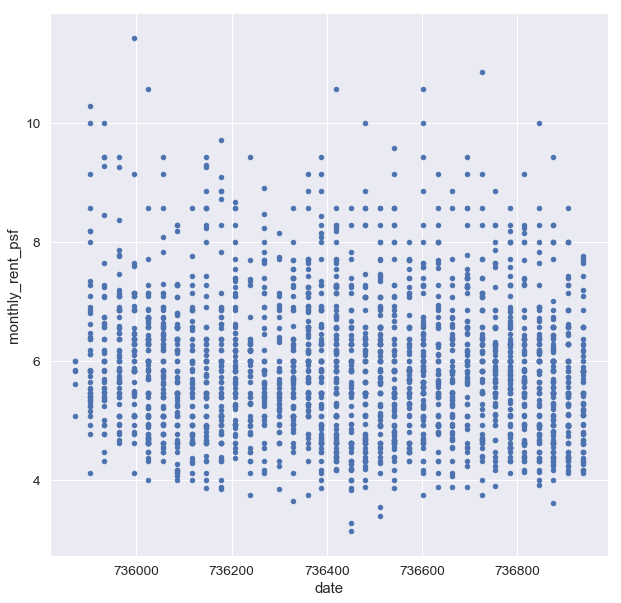

In [9]:
bedroom_1[(bedroom_1.district>1.9)&(bedroom_1.district<2.1)].plot(x='date',y=('monthly_rent_psf'),figsize=(10,10),kind='scatter')

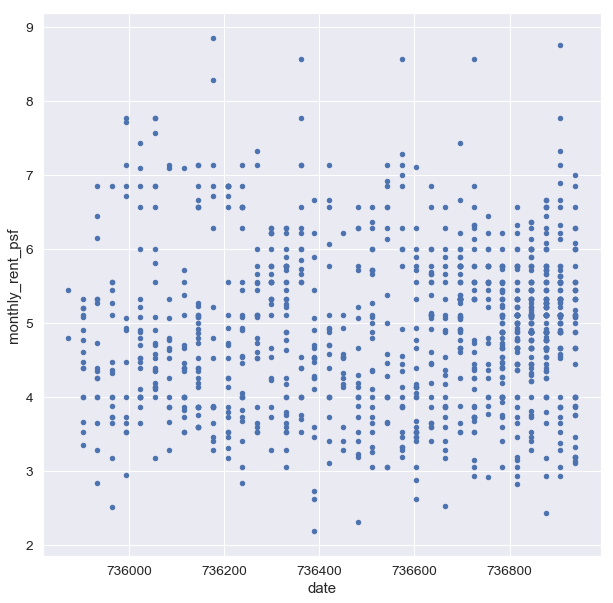

In [10]:
bedroom_1[(bedroom_1.district>2.9)&(bedroom_1.district<3.1)].plot(x='date',y=('monthly_rent_psf'),figsize=(10,10),kind='scatter')

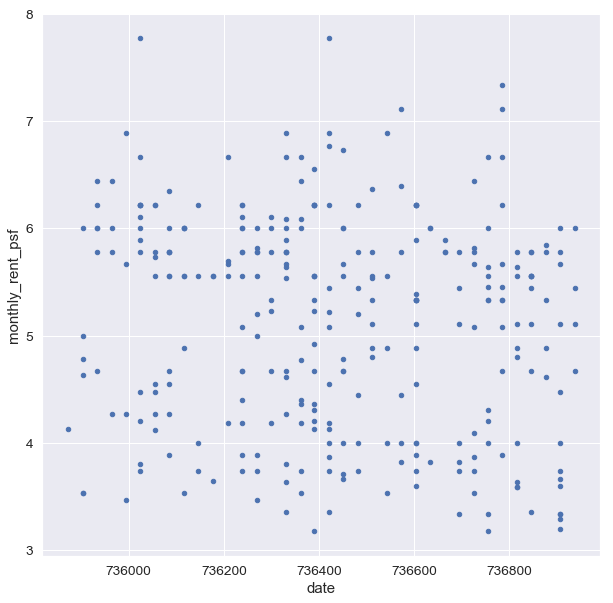

In [11]:
bedroom_1[(bedroom_1.district>3.9)&(bedroom_1.district<4.1)].plot(x='date',y=('monthly_rent_psf'),figsize=(10,10),kind='scatter')

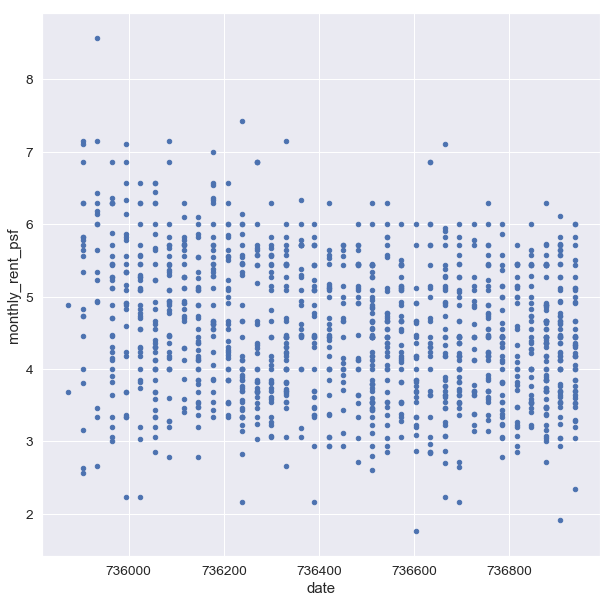

In [12]:
bedroom_1[(bedroom_1.district>4.9)&(bedroom_1.district<5.1)].plot(x='date',y=('monthly_rent_psf'),figsize=(10,10),kind='scatter')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30936 entries, 0 to 34551
Data columns (total 8 columns):
monthly_gross_rent    30936 non-null float64
monthly_rent_psf      30936 non-null float64
district              30936 non-null float64
lat                   30936 non-null float64
long                  30936 non-null float64
no_bedroom            30936 non-null float64
floor_area            30936 non-null float64
date                  30936 non-null float64
dtypes: float64(8)
memory usage: 2.1+ MB


Text(0.5,1,'monthly_rent_psf')

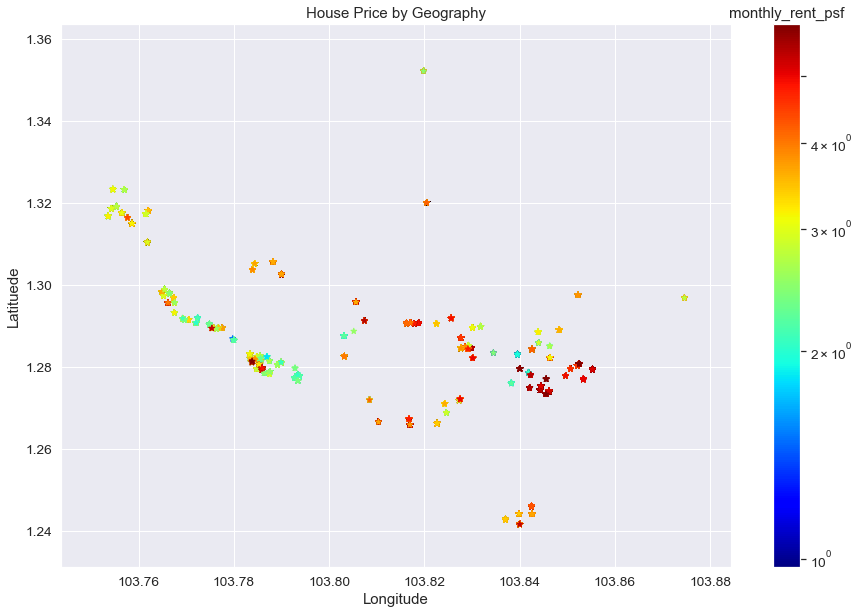

In [23]:
from matplotlib import colors


plt.figure(figsize=(15,10))
vmin = np.min(train.monthly_rent_psf)
vmax = np.max(train.monthly_rent_psf)
norm = colors.LogNorm(vmin*2,vmax/3)
plt.scatter(train.long,train.lat, marker='*',c=train.monthly_rent_psf,norm=norm,cmap='jet') 
plt.xlabel('Longitude')
plt.ylabel('Latituede')
plt.title('House Price by Geography')
clb = plt.colorbar() 
clb.ax.set_title('monthly_rent_psf')

In [1]:
# Ridge, Lasso
# XGBoost
# NN

# ridge for lat long?

In [ ]:
# DATA COllECTION
# ED & LY : PROJECT LOCATION (500 each?) 
# KN : URA DATA

# DATA PREPROCESSING
# KN : One Hot Encoding for district, One Hot Encoding for bedrooms
# KN : Refactor code to display data Prepocessing Step
# LY : 1) Number of bedroom demand, avg price-psf by district to display in follium
# KN : Combining bedroom demand & URA data set together
# 
# Models
# ED: Root Mean Squared Error
# ED: KNN
# LY: Ridge regression
# KN: XGBoost
# LY: Display of val accuracy vs test accuracy (Graph display follow lab)

# Additional
# Decision Tree Model, Neural network mdoel